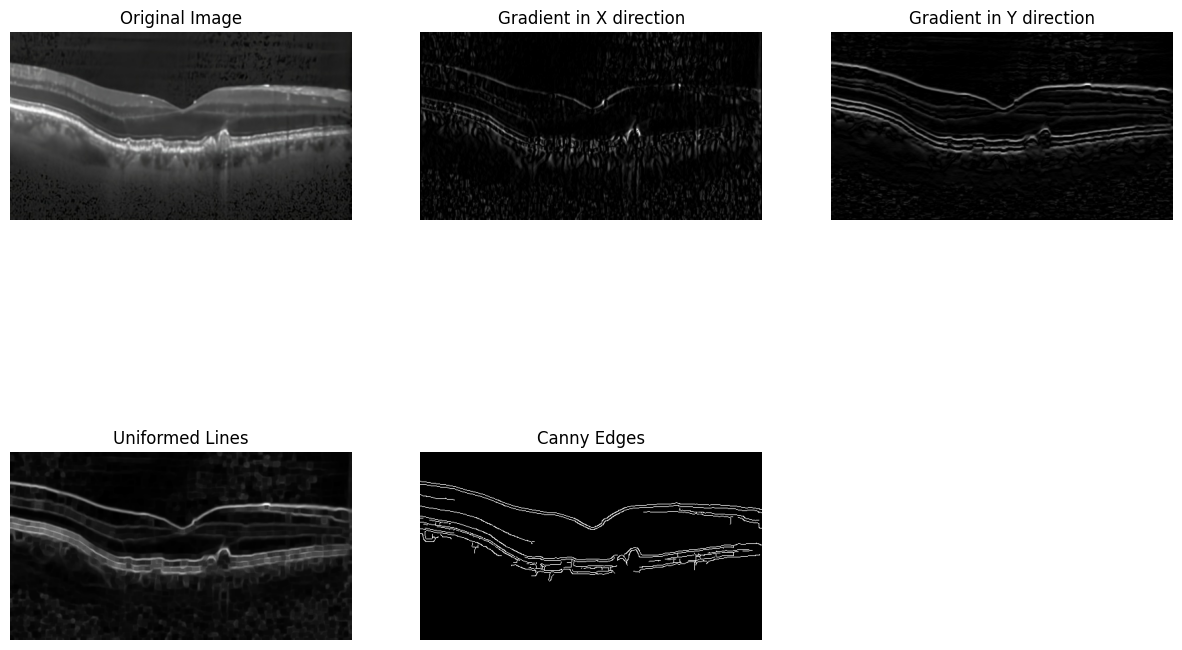

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/ham/Documents/Visual Studio Code/OCT_Ham_Test/img047n.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
    exit()

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply morphological opening to remove noise
kernel = np.ones((5, 5), np.uint8)
opened_image = cv2.morphologyEx(blurred_image, cv2.MORPH_OPEN, kernel)

# Sobel operators
Gx = cv2.Sobel(opened_image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(opened_image, cv2.CV_64F, 0, 1, ksize=3)

# Gradient magnitude
G = np.sqrt(Gx**2 + Gy**2)

# Normalize to range 0-255
Gx = np.uint8(255 * np.abs(Gx) / np.max(Gx))
Gy = np.uint8(255 * np.abs(Gy) / np.max(Gy))
G = np.uint8(255 * G / np.max(G))

# Increase contrast to max
processed_image = cv2.normalize(G, None, 0, 255, cv2.NORM_MINMAX)

# Apply Gaussian smoothing to reduce noise after gradient calculation
processed_image = cv2.GaussianBlur(processed_image, (5, 5), 0)

# Apply morphological closing to combine and smooth the lines
kernel = np.ones((5, 5), np.uint8)
uniformed_lines = cv2.morphologyEx(processed_image, cv2.MORPH_CLOSE, kernel)

# Apply Canny edge detector
edges = cv2.Canny(uniformed_lines, 50, 150)

# Display the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Gradient in X direction
plt.subplot(2, 3, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

# Gradient in Y direction
plt.subplot(2, 3, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

# Uniformed lines
plt.subplot(2, 3, 4)
plt.imshow(uniformed_lines, cmap='gray')
plt.title('Uniformed Lines')
plt.axis('off')

# Canny edges
plt.subplot(2, 3, 5)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.show()

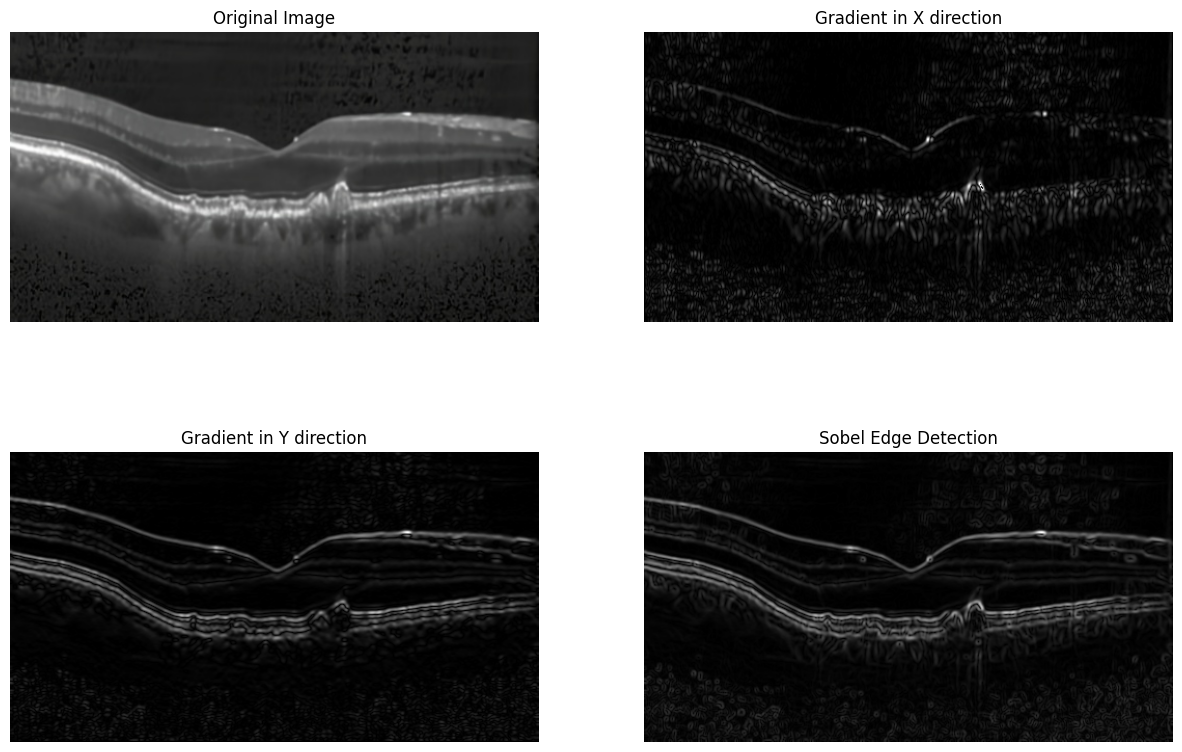

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/ham/Documents/Visual Studio Code/OCT_Ham_Test/img047n.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing (optional)
blurred_image = cv2.GaussianBlur(gray_image, (3, 3), 0)

# Sobel operators
Gx = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Gradient magnitude
G = np.sqrt(Gx**2 + Gy**2)

# Normalize to range 0-255
Gx = np.uint8(255 * np.abs(Gx) / np.max(Gx))
Gy = np.uint8(255 * np.abs(Gy) / np.max(Gy))
G = np.uint8(255 * G / np.max(G))

# Display the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Gradient in X direction
plt.subplot(2, 2, 2)
plt.imshow(Gx, cmap='gray')
plt.title('Gradient in X direction')
plt.axis('off')

# Gradient in Y direction
plt.subplot(2, 2, 3)
plt.imshow(Gy, cmap='gray')
plt.title('Gradient in Y direction')
plt.axis('off')

# Edge-detected image
plt.subplot(2, 2, 4)
plt.imshow(G, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.show()

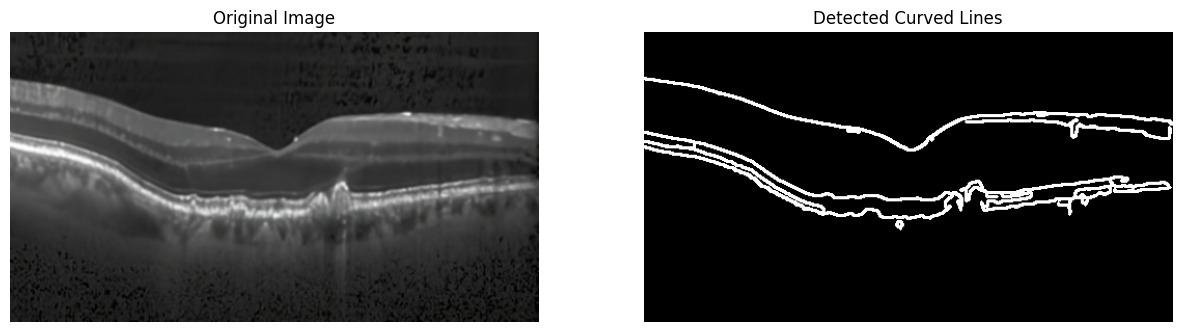

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/ham/Documents/Visual Studio Code/OCT_Ham_Test/img047n.jpeg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image not found at the specified path: {image_path}")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detector
edges = cv2.Canny(blurred_image, 50, 150)

# Increase contrast of the edges
edges = cv2.convertScaleAbs(edges, alpha=2, beta=0)

# Apply morphological operations to enhance edges
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)
edges = cv2.erode(edges, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw the contours
contour_image = np.zeros_like(gray_image)

# Draw the contours
cv2.drawContours(contour_image, contours, -1, 255, thickness=2)

# Display the results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Edge-detected image with contours
plt.subplot(1, 2, 2)
plt.imshow(contour_image, cmap='gray')
plt.title('Detected Curved Lines')
plt.axis('off')

plt.show()